# Dímero de Hubbard a través de K-S para diferentes parámetros de mezclado.

In [1]:
%matplotlib inline
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from sympy.utilities.iterables import multiset_permutations
from time import time
import random
import matplotlib.gridspec as gridspec

In [2]:
def ind_menor(vector):
    
    ind_min=[]
    ordenados=sorted(vector)
    
    for i in range (len(vector)):
        for k in range(len(vector)):
        
            if (vector[k]==ordenados[i]):
                
                ind_min.append(k)
                ind_min.append(k)
            
    return ind_min

In [3]:
P=2
N_e=2

T=np.zeros([P,P])
V=np.zeros([P,P])
W=np.zeros([P,P])
v=np.zeros(P)

for i in range (0,P-1):
    T[i,i+1]=T[i+1,i]=-0.5

u=1

In [4]:
t_0=time()

alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

delta_N=[]
Conver=[]

for i in range (0, len(alpha)):
    
    delta_n=[]
    convergencia=[]
               
    for k in range (0,P):
        v[k]=(-1)**k*2.5
        
    for k in range (0,P):
            V[k,k]=v[k]
            
    n_out=np.zeros(P)
    n_new=np.zeros(P)
    n_old=[1 for x in range(P)]
    n_new[0]=N_e
    
    conver=0
    
    delta_n.append(n_new[0]-n_old[0])
    convergencia.append(conver)
        
    while not(all(abs(np.array(n_old)-np.array(n_out))<0.00001)):
    #for l in range (300):
    #while(abs(n_new[0]+n_new[1]-n_old[0]-n_old[1])>0.0000001):
       
        for k in range (0, P):
            n_old[k]=n_new[k]
                
        #print(n_old, n_new)
            
        for k in range (0,P):
            W[k,k]=0.5*u*n_old[k]
                
        H_ks=T+V+W
            
        evals, ekets=np.linalg.eig(H_ks)
            
        n_out=np.zeros(P)
            
        for k in range(0,P):
            for e in range(0, N_e):
                n_out[k]+=ekets[ind_menor((evals))[e]][k]**2
            
        for k in range(0,P):
            n_new[k]=alpha[i]*n_old[k]+(1-alpha[i])*n_out[k]
            
        conver+=1
        delta_n.append(abs(n_new[0]-n_old[0]))
        convergencia.append(conver)
        
    delta_N.append(delta_n)
    Conver.append(convergencia)
        
t_1=time()-t_0

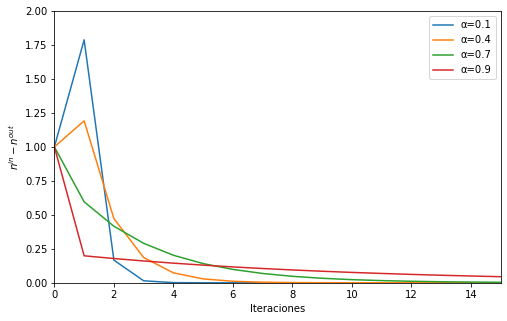

In [5]:
fig, ax = plt.subplots(figsize=(8,5))

plt.ylim(-0, 2)
plt.xlim(0, 15)

ax.plot(Conver[0],delta_N[0])

ax.plot(Conver[3],delta_N[3])

ax.plot(Conver[6],delta_N[6])

ax.plot(Conver[8],delta_N[8])
ax.legend(("α=0.1", "α=0.4", "α=0.7", "α=0.9"))
ax.set_xlabel('Iteraciones')
ax.set_ylabel('$n^{in}-n^{out}$')

fig.savefig('convergencia_alfa.png')

plt.show()